In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('ey_data.csv')

df.iloc[:, 3:] = df.iloc[:, 3:].replace({',': '', ' ': ''}, regex=True).astype(int)
df.drop(['Company ID', 'Company name'], axis=1, inplace=True)

In [30]:
print(df.columns)
print(df.shape)

df.head()

Index(['Industry', 'Number of employees 2023', 'Number of employees 2024',
       'Number of employees 2025', '2023 wages', '2024 wages', '2025 wages',
       '2023 number of claims', '2024 number of claims',
       '2025 number of claims', '2023 medical costs', '2024 medical costs',
       '2025 medical costs'],
      dtype='object')
(202, 13)


,Industry,Number of employees 2023,Number of employees 2024,Number of employees 2025,2023 wages,2024 wages,2025 wages,2023 number of claims,2024 number of claims,2025 number of claims,2023 medical costs,2024 medical costs,2025 medical costs
0,Accommodation and Hospitality,607,1222,3442,51681173,96400212,260009371,4,8,33,27885,47417,154488
1,Government Administration,861,1413,3074,87474722,170496310,343656301,3,6,15,52656,87897,185723
2,Fishing and Agriculture,532,1478,2125,51009504,147938535,237962664,11,23,40,280635,615168,1089305
3,Education,247,648,1638,25502092,96503303,213916588,2,4,10,13326,35746,88579
4,Fishing and Agriculture,231,403,719,18951940,33588906,65421198,4,5,9,121827,202365,319094


In [31]:
for col in df.columns:
    print(col, type(df[col][1]))

Industry <class 'str'>
Number of employees 2023 <class 'int'>
Number of employees 2024 <class 'int'>
Number of employees 2025 <class 'int'>
2023 wages <class 'int'>
2024 wages <class 'int'>
2025 wages <class 'int'>
2023 number of claims <class 'numpy.int64'>
2024 number of claims <class 'numpy.int64'>
2025 number of claims <class 'numpy.int64'>
2023 medical costs <class 'int'>
2024 medical costs <class 'int'>
2025 medical costs <class 'int'>


To estimate claim sizes
$$
\frac{4}{52} \cdot 0.7 \cdot 0.75 \cdot \text{Average salary for the year} + \text{Average medical Costs per claim}
$$

In [32]:
df['2023_avg_salary'] = df['2023 wages'] / df['Number of employees 2023']
df['2024_avg_salary'] = df['2024 wages'] / df['Number of employees 2024']
df['2025_avg_salary'] = df['2025 wages'] / df['Number of employees 2025']

df['2023_avg_medical_cost'] = df['2023 medical costs'] / df['2023 number of claims']
df['2024_avg_medical_cost'] = df['2024 medical costs'] / df['2024 number of claims']
df['2025_avg_medical_cost'] = df['2025 medical costs'] / df['2025 number of claims']

df['2023_expected_claim'] = 4/52 * 0.7 * 0.75 * df['2023_avg_salary'] + df['2023_avg_medical_cost']
df['2024_expected_claim'] = 4/52 * 0.7 * 0.75 * df['2024_avg_salary'] + df['2024_avg_medical_cost']
df['2025_expected_claim'] = 4/52 * 0.7 * 0.75 * df['2025_avg_salary'] + df['2025_avg_medical_cost']

In [33]:
u, c = np.unique(df['Industry'], return_counts=True)

for u, c in zip(u,c):
    print(u, c)

Accommodation and Hospitality 45
Education 22
Fishing and Agriculture 51
Government Administration 11
Health and Community 36
Property and Business Service 37


In [34]:
df.head()

,Industry,Number of employees 2023,Number of employees 2024,Number of employees 2025,2023 wages,2024 wages,2025 wages,2023 number of claims,2024 number of claims,2025 number of claims,...,2025 medical costs,2023_avg_salary,2024_avg_salary,2025_avg_salary,2023_avg_medical_cost,2024_avg_medical_cost,2025_avg_medical_cost,2023_expected_claim,2024_expected_claim,2025_expected_claim
0,Accommodation and Hospitality,607,1222,3442,51681173,96400212,260009371,4,8,33,...,154488,85141.965404,78887.243863,75540.200755,6971.25,5927.125,4681.454545,10409.675526,9112.956002,7732.116499
1,Government Administration,861,1413,3074,87474722,170496310,343656301,3,6,15,...,185723,101596.657375,120662.639774,111794.502602,17552.0,14649.5,12381.533333,21654.941932,19522.414299,16896.311323
2,Fishing and Agriculture,532,1478,2125,51009504,147938535,237962664,11,23,40,...,1089305,95882.526316,100093.731394,111982.430118,25512.272727,26746.434783,27232.625,29384.451675,30788.681627,31754.99237
3,Education,247,648,1638,25502092,96503303,213916588,2,4,10,...,88579,103247.336032,148924.850309,130596.20757,6663.0,8936.5,8857.9,10832.603955,14950.772801,14131.977613
4,Fishing and Agriculture,231,403,719,18951940,33588906,65421198,4,5,9,...,319094,82043.030303,83347.16129,90989.148818,30456.75,40473.0,35454.888889,33770.026224,43838.943052,39129.450668


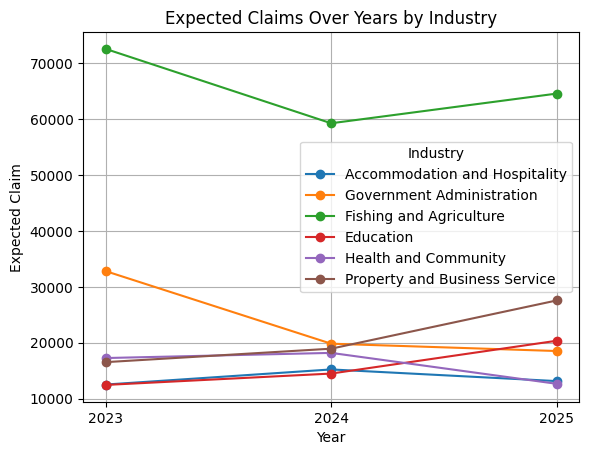

In [35]:

industries = df['Industry'].unique()

for industry in industries:
    subset = df[df['Industry'] == industry]
    
    # Transpose years and claims to plot
    years = ['2023', '2024', '2025']
    claims = subset[['2023_expected_claim', '2024_expected_claim', '2025_expected_claim']].mean()
    
    plt.plot(years, claims, marker='o', label=industry)  # Line plot with markers

# Labels and title
plt.xlabel('Year')
plt.ylabel('Expected Claim')
plt.title('Expected Claims Over Years by Industry')
plt.legend(title='Industry')
plt.grid(True)
plt.show()

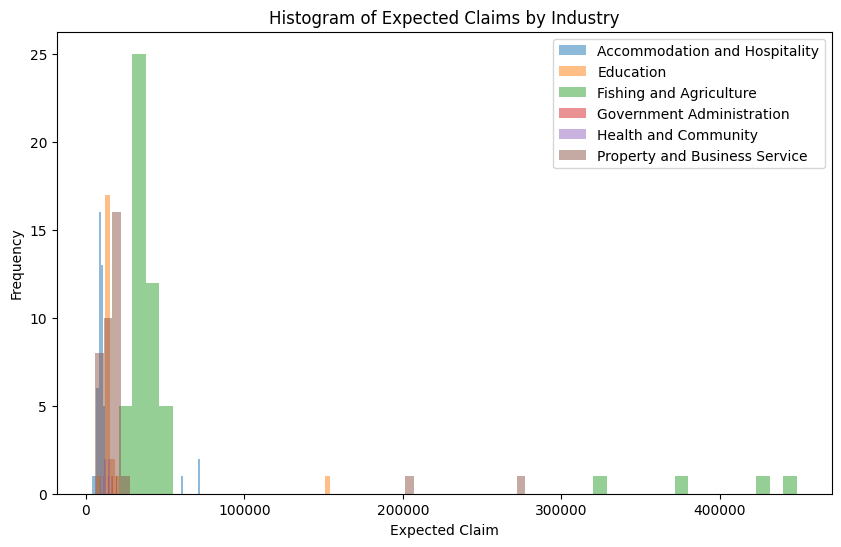

In [47]:
df_filtered = df[df['2025_expected_claim'] <= 100_000]

# Create histogram for each industry
plt.figure(figsize=(10, 6))

for industry in industries:
    subset = df_filtered[df_filtered['Industry'] == industry]  # Filter data by industry
    plt.hist(subset['2025_expected_claim'], bins=50, alpha=0.5, label=industry)  # Histogram

plt.xlabel('Expected Claim')
plt.ylabel('Frequency')
plt.title('Histogram of Expected Claims by Industry')
plt.legend()
plt.show()

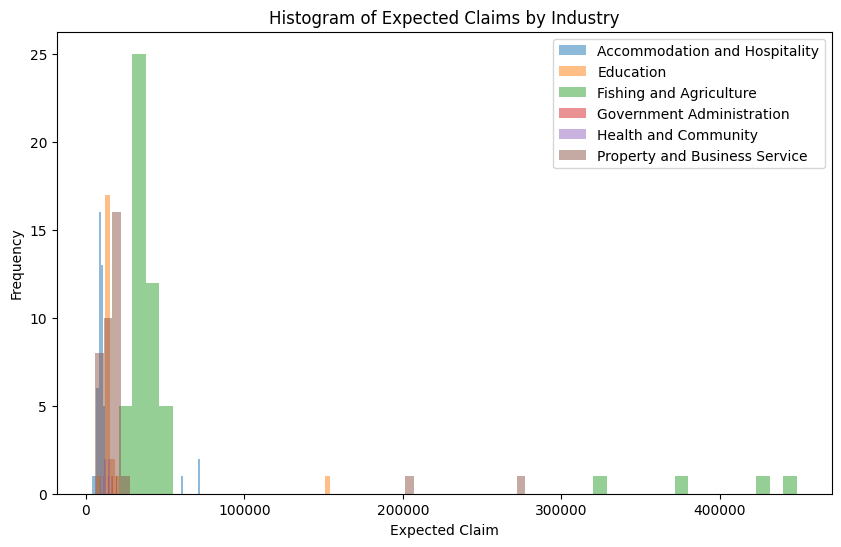

In [50]:
# Create histogram for each industry
plt.figure(figsize=(10, 6))

for industry in industries:
    subset = df[df['Industry'] == industry]  # Filter data by industry
    plt.hist(subset['2025_expected_claim'], bins=50, alpha=0.5, label=industry)  # Histogram

plt.xlabel('Expected Claim')
plt.ylabel('Frequency')
plt.title('Histogram of Expected Claims by Industry')
plt.legend()
plt.show()

# Premium Calculation

The premium for industry $j$ is given by,
$$
P = z \bar{X}_j + (1-z) \; m,
$$
We use Buhlmann credibility to estimate each $z$, wherein
$$
z = \frac{T}{T + \frac{s^2}{a}}
$$

To estimate each parameter,
$$
\begin{align*}
\hat{m} &= \frac{1}{J} \sum_{j=1}^J \bar{X}_{j} \\
\hat{s}^2 &= \frac{1}{J} \sum_{j=1}^{J} \sum_{t=1}^{T} \frac{(X_{j,t}-\bar{X}_{j})^{2}}{T-1} \\
\hat{a} &= \max \left[ \frac{\sum_{j=1}^{J}(\bar{X}_{j} - \bar{X})^{2}}{J-1} - \frac{1}{T} \hat{s}^{2} ; 0\right]
\end{align*}
$$

In [46]:
T = 3
industry_df = df.groupby("Industry", as_index=False).mean()

## EXCLUDE FISHING AND AGRICULTURE FROM CALCULATIONS
industry_df = industry_df.loc[industry_df["Industry"] != "Fishing and Agriculture"]

# calculate m
means = []
for _, row in industry_df.iterrows():
    X_j = np.mean([
        row['2023_expected_claim'],
        row['2024_expected_claim'],
        row['2025_expected_claim']
    ])
    means.append(X_j)

m = np.mean(means)

# s^2
variances = []
for _, row in industry_df.iterrows():
    obs = [
        row['2023_expected_claim'],
        row['2024_expected_claim'],
        row['2025_expected_claim']
    ]
    var = np.var(obs, ddof=1)
    variances.append(var)

s_2 = np.mean(variances)

# a
a = np.max(np.var(means, ddof=1) - 1/T * s_2, 0)

z = T/(T + s_2/a)

print(f"""
m = {m}
s^2 = {s_2}
a = {a}

z = {z}
""")


m = 18025.127213086707
s^2 = 24750694.38241175
a = 9196664.267749898

z = 0.5271232436323053

